In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import healpy as hp
from lsst.sims.utils import haversine

In [2]:
names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'observationStartMJD']
types = [float]*4
npts = 180
data = np.zeros(npts, dtype=list(zip(names,types)))
data['rotSkyPos'] = np.arange(0,npts*2,2)
deltaMJD = 34.*npts/3600./24.
expMJD_0 = 57000.
data['observationStartMJD'] = expMJD_0+np.arange(0,deltaMJD, 34./3600./24.)

In [3]:
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
nside = 256
metric = metrics.CountMetric(col='fieldRA')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, useCache=False)
bundle = metricBundles.MetricBundle(metric,slicer,'')

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [5]:
%%time
bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
bg.setCurrent('')
bg.runCurrent('',simData=data)

Running:  [1]


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:110: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
CPU times: user 36.4 s, sys: 546 ms, total: 36.9 s
Wall time: 46.4 s


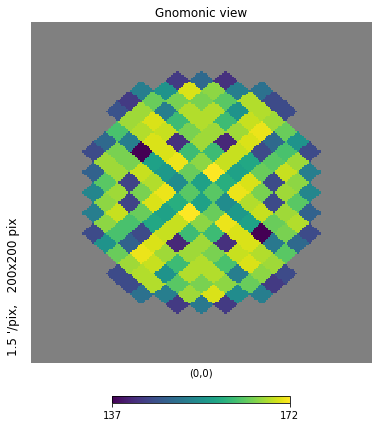

In [6]:
bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN
hp.gnomview(bundle.metricValues.data)

In [7]:
print('fill factor = %f' % (bundle.metricValues.mean()/bundle.metricValues.max()))

fill factor = 0.930105


In [8]:
good = np.where(bundle.metricValues.mask != True)
# compute the ra and dec of each pixel, find distance to 0,0
lat, ra = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))[good])
dec = np.pi/2. - lat
radius = haversine(ra,dec,0.,0.)

Text(0, 0.5, 'Number of Observations (max 180)')

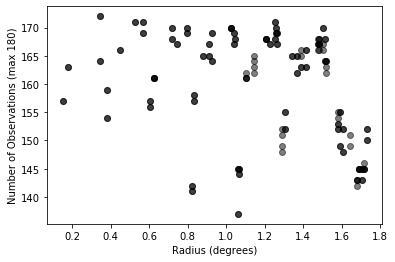

In [9]:
plt.plot(np.degrees(radius), bundle.metricValues.data[good], 'ko', alpha=.5)
plt.xlabel('Radius (degrees)')
plt.ylabel('Number of Observations (max %i)' % npts)

Text(0, 0.5, 'Fill Factor')

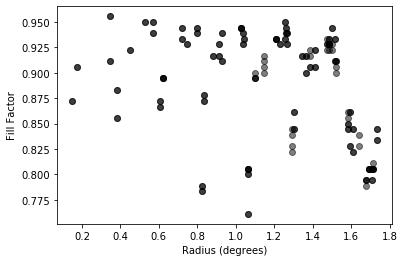

In [10]:
plt.plot(np.degrees(radius), bundle.metricValues.data[good]/npts, 'ko', alpha=.5)
plt.xlabel('Radius (degrees)')
plt.ylabel('Fill Factor')

In [11]:
# Let's look at just one pointing
bg.runCurrent('',simData=data[0:1])

Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


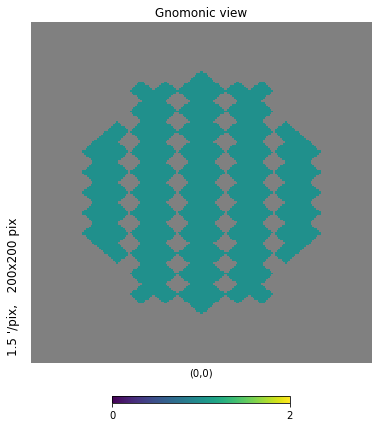

In [12]:
bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN
hp.gnomview(bundle.metricValues.data)

In [13]:
print('fill factor = %f' % (bundle.metricValues.mean()/bundle.metricValues.max()))

fill factor = 1.000000


In [17]:

metric = metrics.CountMetric(col='fieldRA')
slicer = slicers.HealpixSlicer(nside=nside)
bundle = metricBundles.MetricBundle(metric,slicer,'')

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [18]:
%%time

bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
bg.setCurrent('')
bg.runCurrent('',simData=data)

Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
CPU times: user 1min 10s, sys: 755 ms, total: 1min 11s
Wall time: 1min 24s


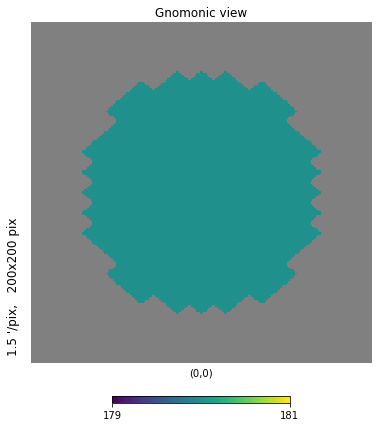

In [19]:
bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN
hp.gnomview(bundle.metricValues.data)